# Color-based Nearest Neighbors Image Retrieval (Pattern Matching)

Metode: Dominant Intensity

Sample case: Deteksi nominal uang kertas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Data path

# 1. Load Citra Referensi

In [2]:
path_referensi = "/content/drive/MyDrive/Referensi"
path_uji = "/content/drive/MyDrive/Uji"

In [3]:
import os

file_referensi = os.listdir(path_referensi)
print(file_referensi)

['5k_gambar1.jpg', '5k_gambar2.jpg', '10k_gambar1.jpg', '10k_gambar2.jpg', '10k_gambar3.jpg', '2k_gambar1.jpg', '2k_gambar2.jpg', '2k_gambar4.jpg', '10k_gambar4.jpg', '5k_gambar4.jpg', '2k_gambar3.jpg', '5k_gambar3.jpg']


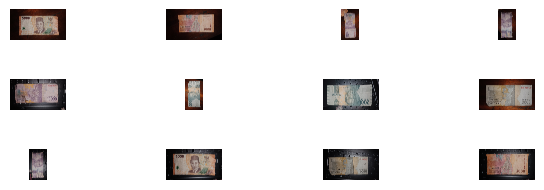

In [5]:
import matplotlib.pyplot as plt
# Menampilkan semua 28 gambar dalam grid 7x4
num_cols = 4  # Jumlah kolom
num_rows = 7  # Jumlah baris

for i in range(len(file_referensi)):  # Loop melalui semua file referensi
  plt.subplot(num_rows, num_cols, i+1)  # Sesuaikan subplot menjadi 7x4
  img_path = os.path.join(path_referensi, file_referensi[i])
  plt.imshow(plt.imread(img_path))
  plt.tight_layout()
  plt.axis('off')

plt.show()

# 2. Ekstraksi fitur untuk citra referensi

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def create_features(img):
  R = np.mean(img[:,:,0].flatten())
  G = np.mean(img[:,:,1].flatten())
  B = np.mean(img[:,:,2].flatten())
  img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  H = np.mean(img_hsv[0])
  return [R,G,B,H]

In [7]:
feat_referensi = []
for file_img in file_referensi:
  # Gunakan os.path.join untuk menggabungkan path
  img_path = os.path.join(path_referensi, file_img)
  img = plt.imread(img_path)
  feat_referensi.append(create_features(img))

print(feat_referensi)

[[87.43403382694541, 65.2419487002118, 56.18374795039967, 83.4531045751634], [75.36266834477694, 52.64629225165676, 46.233032832035256, 78.45351307189543], [107.17700519232083, 79.0512075561932, 73.95790409151465, 73.68815331010452], [83.28566859670697, 66.1488162490606, 67.6390769112523, 79.30574912891986], [90.09442839635854, 78.96602755431441, 80.81554771298764, 67.4625], [118.78637496156999, 98.51568072350892, 88.61812305714969, 57.64430894308943], [98.35464864299378, 100.63507570711211, 100.09904490759719, 69.40988562091503], [102.12758484491357, 82.68007073256132, 72.1147387613582, 87.68308823529412], [86.35730671841908, 78.38792230306757, 83.19588137084102, 22.064750290360045], [87.92748172439708, 76.68932008779122, 70.89838455199153, 53.75122549019608], [68.49568473730956, 64.99535114350618, 62.243460173703625, 52.61323529411764], [86.72769864043178, 70.6370281649245, 65.14244273929084, 51.8125]]


# 3. Load citra yang akan dideteksi

In [8]:
file_uji = os.listdir(path_uji)
print(file_uji)

['5k_gambar1.jpg', '5k_gambar2.jpg', '10k_gambar1.jpg', '10k_gambar2.jpg', '10k_gambar3.jpg', '2k_gambar1.jpg', '2k_gambar2.jpg', '2k_gambar3.jpg', '2k_gambar4.jpg', '10k_gambar4.jpg', '5k_gambar3.jpg', '5k_gambar4.jpg']


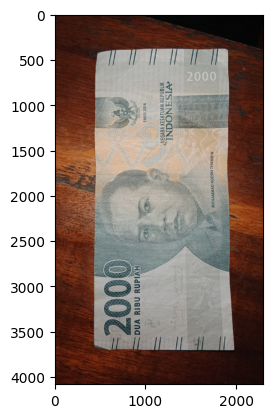

In [9]:
ID_UJI =5

# Gunakan os.path.join untuk menggabungkan path
img_path = os.path.join(path_uji, file_uji[ID_UJI])
img_uji = plt.imread(img_path)

plt.imshow(img_uji)

# 4. Ekstraksi fitur gambar yang diuji

In [10]:
feat_uji = create_features(img_uji)
print(feat_uji)

[118.78637496156999, 98.51568072350892, 88.61812305714969, 57.64430894308943]


# 5. Hitung jarak dari fitur gambar ke referensi

In [11]:
import pandas as pd

hasil = []
for idx, referensi in enumerate(feat_referensi):
  jarak = np.linalg.norm(np.array(feat_uji) - np.array(referensi))

  # Ekstrak nominal dari nama file dengan regex
  import re
  nominal_ditanyakan = int(re.search(r'(\d+)k', file_uji[ID_UJI]).group(1)) * 1000
  nominal_referensi = int(re.search(r'(\d+)k', file_referensi[idx]).group(1)) * 1000

  temp = {
      "nominal_ditanyakan": nominal_ditanyakan,
      "nominal_referensi": nominal_referensi,
      "jarak": jarak,
  }
  hasil.append(temp)

df_jarak = pd.DataFrame(hasil)
df_jarak.head()

,nominal_ditanyakan,nominal_referensi,jarak
0,2000,5000,61.710560
1,2000,5000,78.861511
2,2000,10000,31.400162
3,2000,10000,56.720829
4,2000,10000,36.914683


# 6. Ambil k terdekat

In [12]:
# sort by jarak dan ambil k terdekat
K_NEAREST = 5

df_k = df_jarak.sort_values(by=['jarak']).head(K_NEAREST)
df_k

,nominal_ditanyakan,nominal_referensi,jarak
5,2000,2000,0.000000
6,2000,2000,26.309459
2,2000,10000,31.400162
4,2000,10000,36.914683
7,2000,2000,41.267079


In [13]:
# ambil nilai prediksi dari 5 nilai tadi
df_freq = df_k['nominal_referensi'].value_counts()
df_freq

,count
nominal_referensi,
2000,3
10000,2


In [14]:
print("Prediksi nilai nominal mata uang berdasarkan data referensi adalah: ")
print(df_freq.index[0])

Prediksi nilai nominal mata uang berdasarkan data referensi adalah: 
2000
